<a href="https://colab.research.google.com/github/unknowchar/NN-imgClasification/blob/main/NN_imgClasification_15052023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCIÓN


---


>## Dataset: MNIST
>El set de datos elegido para este proyecto fue el data set de MNIST. Este dataset surgió alrededor de 1999 siendo un ejemplo básico y bueno para aquellos que deseen experimentar con las redes Neuronales y la computación visual, siendo un dataSet relativamente sencillo y común de entrenar entre los miles de datasets que existen en la actualidad.
>### Características
> * Está compuesto por 70,000 imágenes, de las cuales 60,000 de ellas son regularmente usadas para entrenar a la red neuronal y las otras 10,000 son usadas para realizar las pruebas de entrenamiento. 
>*Estás imágenes tienen un alto y ancho de 28px, cada una de ellas contiene un número del 0 al 9, siendo claramente 10 categorías para la salida de datos de está red. 
>* Todas estás imágenes están en una escala de grises.


---


>## Arquitectura de red neuronal: Convolucional
>>## Conceptos básicos
>>### ¿Qué es la convolución?
La convolución consiste en realizar un barrido de la imagen para tomar grupos de píxeles cercanos entre sí de la imagen de entrada y realizar un producto punto contra un kernel y un respectivo pooling.

>>### Kernel
El kernel es un filtro, el cual, se le aplica a la imagen a procesar para así extraer características especiales de la imagen para después hacer uso de estos nuevos valores filtrados. Principalmete se detectan bordes, desenfoque, entre otras características. Estos filtros están estructurados por matrices con valores predeterminados los cuales se multiplican contra un grupo de píxeles. <br> 

>>### Pooling
El pooling tiene en común con el kernel el manejo de  agrupaciones de píxeles específicas, funciona también como un "filtro" tomando únicamente los valores más altos de esas agrupaciones especificadas hasta reducirlas notablemente para al final sear reagrupadas y mantener sus características, siendo posible combinarse junto con el  Kernel para obtener detalles más precisos.

>### Red Neuronal Convolucional
>### Estructura
Las redes neuronales convolucionales suelen ser una arquitectura muy convencional para el procesamiento y clasificación de imágenes. Existen muchos modelos de redes neuronales convolucionales, pero al trabajar en los datos de MNIST hablaremos del modelo de RNC llamado LeNet. Este modelo está compuesto de dos partes, uno en donde hace recepción de los datos (su capa de entrada) mediante 2 capas convolucionales que incluyen su respectivo sistema de pooling.
Las capas convolucionales se dedican a extraer características de las imágenes y de obetener una representación compacta y con base a esta seguir compactandola aun más y de realizar la calsificación de cada imagen.



---



>## Modelo Lenet
El modelo Lenet utiliza la arquitectura de una red neuronal convolucional, disminuyendo su alto y su ancho pero al mismo tiempo de que este ocurre su profundidad aumenta progresivamente. 
<img src="https://www.codificandobits.com/img/posts/2019-04-26/red-lenet.png">






# DESARROLLO

Al utlizar el modelo LeNet necesitaremos múltiples secciones de keras para el desarrolllo de la red neuronal.

### tensorflow.keras.datasets.mnist
Como ya mencionamos anteriormente, nuestro dataset escogido fue el de mnist, el cual contiene miles de imágenes de números escritos a mano por diferentes personas, los cuales van del 0 hasta el 9.

### tensorflow.keras.layers.Conv2D and .MaxPooling2D
Ya que el modelo LeNet tiene la arquitectura de una RNC utilizaremos Conv2D para crear las capas convolucionales y el MaxPooling2D para realizar también el debido Pooling a las imágenes y poder filtrarlas.

### tensorflow.keras.optimizers.SGD
Con esta sección de keras incorporaremos el algoritmo de gradiente descendiente para proporcionar parte de los factores de aprendizaje necesarios.

### tensorflow.keras.layers.Flatten and Dense
Flatten nos ayudará a aplanar la imagén despues de que pase por las capas convolucionales y filtros del MaxPooling para después procesarlas mediante capas densas las cuales se encargarán de realizar las operaciones necesarias para su clasificación.

### tensorflow.keras.utils.np_utils
Esta herramienta nos ayudará a realizar una encocodificación one-hot para realizar la clasificación de las etiquetas, ya que Keras requiere de esta encodificación para las clasificaciones.

### tensorflow.keras.models.Sequential
Y por último importaremos la sección de Sequential la cual nos permitira crear el modelo (como su mismo nombre lo dice) secuencial de capas para el procesamiento y clasificación de las imágenes.



In [2]:

import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


---


También importaremos algunas herramientas proporcionadas por numpy.

### np.random.seed(2)
Utilizamos está semilla nos ayudará a que cada vez que la red neuronal entre en funcionamiento, los valores para los filtros y los coeficientes se reinicien en este mismo número proporcionado.

### matplotlib.pyplot.plt
Solo utilizaremos pyplot para realizar momentanamente una visualización de las imágenes a lo largo de nuestro entrenamiento, además de ayudarnos con el análisis de rendimiento para después realizar el tunning.

In [3]:
import numpy as np 
np.random.seed(2)

import matplotlib.pyplot as plt

---
##Carga y visualización de características de dataset

Ahora carguemos el dataset.
Para ello haremos uso de cuatro variables.


*   train_X
*   train_Y
*   x_test
*   y_test

train_X contiene las imágenes mientras que train_Y contiene todas las etiquetas de estás imágenes.
Mientras tanto las variables x_test e y_test, contienen estos mismo valores mencionados anteriormente, la única diferencia que hay entre estos dos es el contexto en el que serán utilizadas en la red neuronal.

Recordemos que las redes neuronales necesitan de ejemplos para aprender a clasificar, es por eso que le damos una determinada cantidad de imágenes y etiquetas para ser utilizadas como referencia.

In [4]:

#CARGA DE DATASET PARA TRABAJAR SOBRE ÉL 
(train_X,train_Y),(x_test,y_test) = mnist.load_data()


Podemos ver que se han cargado correctamente las imágenes junto con sus etiquetas.
Siendo agregadas 60,000 imágenes para el entrenamiento y 10,000 para realizar pruebas durante el mismo, todas ellas con una resolución de 28x28px

In [5]:
print("Imágenes contenidas en train_X")
print(train_X.shape)

print("Etiquetas para imágenes en train_Y")
print(train_Y.shape)

print("Imágenes contenidas en x_test")
print(x_test.shape)

print("Etiquetas para imágenes en y_test")
print(y_test.shape)

Imágenes contenidas en train_X
(60000, 28, 28)
Etiquetas para imágenes en train_Y
(60000,)
Imágenes contenidas en x_test
(10000, 28, 28)
Etiquetas para imágenes en y_test
(10000,)


---
##Ajuste de datos en imágenes y encodificación one-hot para etiquetas

Debido a que las clasificaciones se realizar mediante 0 y 1 necesitamos normalizar los valores contenidos en las imágenes así que para ello dividiremos el valor real entre un valor estimado, en este caso 255 ya que los valores contenidos en la imagen tienen un rango de entre 0 a 255 por la escala RGB.

En el caso de las etiquetas, keras hace uso de una encodificación llamado one hot, que da valores en bits a las etiquetas clasificandolas con 1 y 0 a lo largo de un array, siendo 0 la clasificación a la que no pertenece y 1 a la que sí.

Para entender rápidamente esto, podemos tomar en cuenta la clasificación de tres colores: 
* Rojo 
* Verde
* Azul

Al utilizar la encodificación One-hot podríamos visualizarlo de la siguiente forma.

<img src="https://miro.medium.com/v2/resize:fit:837/1*d5-PQyRRjvzBZjI5f7X3hA.png">

Lo mismo se aplica para la clasifiación de los números al realizar nuestra encodificación hacia las etiquetas.

Creamos una variable en donde especificaremos el número de clasificaciones, siendo estás un número de 10 y haremos uso de np_utils.categorical para la encodificación OH. Está función recibe dos parámetros, el array con las respectivas etiquetas y el número de clases, para realizar la encodificación.



In [15]:

train_X= train_X/255.0
x_test= x_test/255.0


train_Y= to_categorical(train_Y,10)
y_test= to_categorical(y_test,10)


---
##Visualización de imágenes

Ahora con todas estás configuraciones realizadas hágamos la visualización de una imágen.


(-0.5, 27.5, 27.5, -0.5)

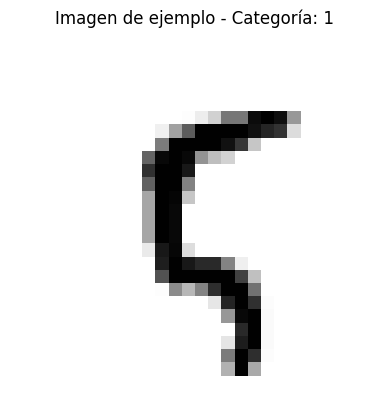

In [16]:
nimagen = 100
plt.imshow(train_X[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title("Imagen de ejemplo - Categoría: " + str(np.argmax(train_Y[nimagen])))
plt.axis("off")

---

#Creación de modelo secuencial

Ahora tomando en cuenta la vista en la introducción sobre la estructura del modelo LeNet
<img src="https://www.codificandobits.com/img/posts/2019-04-26/red-lenet.png">

Podemos denotar las características de este modelo para cada una de las capas a crear. Antes de immplementarlo a código hagamos una lista de las capas que implementaremos


# Listado de características de capas

> CONV 1
*   Filtros = 6 de 5x5x1
*   padding=0
*   strides=1
*   Función de activación: ReLU

> MAX-POOLING 1
*   Filtros = 6 de 2x2
*   padding=0
*   strides=2
*   Función de activación: Ninguna

> CONV 2
*   Filtros = 16 de 5x5x6
*   padding=0
*   strides=1
*   Función de activación: ReLU

> MAX-POOLING 2
*   Filtros = 16 de 2x2
*   padding=0
*   strides=2
*   Función de activación: Ninguna

> Flatten
*   No recibe características, solo aplanara los volúmenes proporcionados con anterioridad.


> DENSE 1
*   Neuronas = 120
*   Función de activación: ReLU

> DENSE 2
*   Neuronas = 84 
*   Función de activación: ReLU

> SALIDA
*   No de categorías = 10
*   Función de activación: softmax


---



Ahora primero necesitaremos crear el modelo secuencial, para ello necesitamos donde almacenarlo, así que utilizaremos la siguiente herramienta que sería crear un sequential, al cual llamaremos modelo. Este mismo contendrá todas las capas mencionadas con anterioridad y sus características.

In [11]:
modelo = Sequential()

Después crearemos las capas.

In [17]:
modelo.add(Conv2D(filters=6,kernel_size=(5,5),activation="relu",input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(120,activation="relu"))
modelo.add(Dense(84, activation="relu"))

modelo.add(Dense(10,activation="softmax"))

Podemos ver que cada una de las características mencionadas en la lista esta implementada en cada una de las capas agregadas al modelo convolucional.
Los filtros en cada MaxPooling no se vuelven a mencionar por que se excepcionan a la hora de especificar la cantidad de filtros debido a que contendrían por default los de su capa anterior.
En el caso del stride y el padding estos se declaran por default.

---

///Avance:
Ivo Alberto Ramírez Gaeta
15/05/2023
4:02 p.m.